In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [15]:
torch.__version__

'1.7.1'

## 3. Linear Regression

In [6]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)

In [9]:
y = 2*x + 3
y_noise = y + noise

In [10]:
model = nn.Linear(1, 1)
loss_func = nn.L1Loss()

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [14]:
label = y_noise

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())
    print(param_list[0].item(), param_list[1].item())

/opt/conda/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


tensor(12.8946)
-0.46504348516464233 0.48894214630126953
-0.41519105434417725 0.4902021586894989
-0.36533862352371216 0.49146217107772827
-0.31548619270324707 0.49272218346595764
-0.265633761882782 0.493982195854187
-0.2157813459634781 0.4952422082424164
-0.1659504771232605 0.4965222179889679
-0.1161196157336235 0.4978022277355194
-0.06630033254623413 0.49910223484039307
-0.016551831737160683 0.5004622340202332
tensor(10.4096)
0.03314098343253136 0.5018622279167175
0.08280825614929199 0.5032822489738464
0.13247552514076233 0.5047022700309753
0.18214279413223267 0.5061222910881042
0.23173415660858154 0.5075823068618774
0.2812044024467468 0.5091223120689392
0.33057478070259094 0.5107223391532898
0.37981656193733215 0.5123823285102844
0.42897412180900574 0.5140823125839233
0.47798484563827515 0.5158423185348511
tensor(7.9631)
0.5269955992698669 0.5176023244857788
0.5760063529014587 0.5193623304367065
0.6250171065330505 0.5211223363876343
0.6739062666893005 0.5229423642158508
0.72274565696

1.995547890663147 2.220442533493042
1.9952908754348755 2.2261226177215576
1.9952963590621948 2.2317426204681396
1.9953757524490356 2.237342596054077
1.9954150915145874 2.242882490158081
1.9952951669692993 2.2484025955200195
1.9952685832977295 2.2539026737213135
1.9952304363250732 2.259382724761963
tensor(1.0034)
1.9950658082962036 2.2648427486419678
1.9948376417160034 2.2702627182006836
1.9946962594985962 2.2756426334381104
1.994554877281189 2.281022548675537
1.9944134950637817 2.286402463912964
1.9942721128463745 2.2917823791503906
1.9939152002334595 2.2970824241638184
1.9935582876205444 2.302382469177246
1.9933762550354004 2.3076624870300293
1.9929752349853516 2.3129024505615234
tensor(0.9748)
1.9925682544708252 2.318082332611084
1.9921612739562988 2.3232622146606445
1.991828203201294 2.328402280807495
1.9924460649490356 2.3334221839904785
1.9928654432296753 2.3384621143341064
1.9930094480514526 2.3434622287750244
1.9934672117233276 2.3484222888946533
1.993524432182312 2.353322267532

tensor(0.7929)
2.0029146671295166 2.899120807647705
2.003030776977539 2.900080919265747
2.00296688079834 2.9010210037231445
2.0029029846191406 2.901961088180542
2.0028390884399414 2.9029011726379395
2.002775192260742 2.903841257095337
2.002711296081543 2.9047813415527344
2.002723455429077 2.9057114124298096
2.0028116703033447 2.9066314697265625
2.0028998851776123 2.9075515270233154


## 4. Neural Network

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import matplotlib.pyplot as plt

In [18]:
num_data = 1000
num_epoch = 10000

In [19]:
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)

In [20]:
y = (x**2) + 3
y_noise = y + noise

In [21]:
model = nn.Sequential(
            nn.Linear(1, 6),
            nn.ReLU(),
            nn.Linear(6, 10),
            nn.ReLU(),
            nn.Linear(10, 6),
            nn.ReLU(),
            nn.Linear(6, 1)
            )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

In [22]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

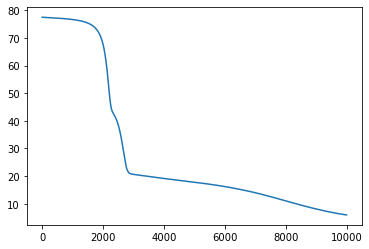

In [23]:
plt.plot(loss_array)
plt.show()

## 5. CNN

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms # 이미지를 필요에 따라 변환시켜주는 역할
from torch.utils.data import DataLoader # 데이터를 하나씩 전달하지 않고 배치사이즈를 정해 전달하는 역할의 모듈

In [25]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [27]:
mnist_train = dset.MNIST("./",
                         train=True,
                         transform=transforms.ToTensor(),
                         target_transform=None,
                         download=True)

mnist_test = dset.MNIST("./",
                         train=False,
                         transform=transforms.ToTensor(),
                         target_transform=None,
                         download=True)

In [28]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size=batch_size, # batch size 지정
                                           shuffle=True, # 셔플 지정
                                           num_workers=2, # 프로세서 개수 지정
                                           drop_last=True # 배치 사이즈로 묶은 뒤 남은 데이터 처리 여부
                                           )

test_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2,
                                          drop_last=True)

In [31]:
class CNN(nn.Module): # nn.Module 을 상속 받는다.
    def __init__(self):
        super(CNN, self).__init__()  # super 클래스는 CNN의 부모 클래스인 nn.Module을 초기화하는 역할
        self.layer = nn.Sequential(
                     nn.Conv2d(1, 16, 5),
                    # conv 레이어는 (in, out, k, s, p) 로 이루어진다. k는 kernel, s 는 stride, p는 padding
                    # in channel 은 채널의 수다. RGB는 3, 단색은 1 등등
                    # out channel은 필터(커널)의 개수다. 여기선 16개의 필터를 두겠다는 것이다. 각 필터당 activation map이 나오니
                    # 16개의 out 이 되는 것이다. s는 default로 1이 들어가니 넣지 않았고, p는 여기서는 없다.
                    # 첫번째 conv layer를 통과하기 전, 텐서 shape은 [batch_size, 1, 28, 28] 이다. 이미지가 1*28*28 임.
                    # 첫번째 conv layer를 통과하면 텐서 shape는 [batch_size, 16, 24, 24] 다.
                    # 16*24*24로 바뀌는 이유는 커널을 통해 이미지 사이즈가 변경되며, (28-K+2P/S)+1 을 풀면 24다.
                     nn.ReLU(),
                     nn.Conv2d(16, 32, 5),
                     nn.ReLU(),
                     nn.MaxPool2d(2, 2),
                    # max pooling layer는 (k, s, p)를 인자로 받는다.
                    # k를 2로 주었으니 2*2 의 winodw로 훑고, s를 2로 주었으니 2칸을 뛰어넘는다. 기본 설정이다.
                    # 그렇게 되면 텐서 shape은 절반으로 줄어들게 된다.
                     nn.Conv2d(32, 64, 5),
                     nn.ReLU(),
                     nn.MaxPool2d(2, 2)
                    # 여기까지 텐서 shape을 잘 계산 했다면, [batch_size, 64, 3, 3] 이 나와야 한다.
                    )
        self.fc_layer = nn.Sequential(
                     nn.Linear(64*3*3, 100), # conv layer에서 나온 64*3*3 을 100개로 내뿜고
                     nn.ReLU(),
                     nn.Linear(100, 10) # 100개를 받아서 10개(분류해야 하는 클래스 개수) 로 내뿜는다.
                    )
    
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        # conv layer를 통해서 나온 텐서의 shape 이 64*3*3 이기 때문에
        # 이를 fc layer에 연결하기 위해서는 flatten을 해줘야 한다.
        # 앞의 배치사이즈는 그대로 두고 -1 인자를 주어 컴퓨터가 계산하게 만든다. 그러면 64*3*3이 쭉 펴진다.
        out = self.fc_layer(out)
        
        return out # 최종적으로 (batch_size, 10)의 텐서 shape을 가진 output이 도출된다.

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN().to(device) # 디바이스 위에 모델을 올린다.
loss_func = nn.CrossEntropyLoss() # 분류문제는 크로스 엔트로피.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
loss_arr = []
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3024, grad_fn=<NllLossBackward>)
tensor(0.2891, grad_fn=<NllLossBackward>)
tensor(0.1293, grad_fn=<NllLossBackward>)
tensor(0.0850, grad_fn=<NllLossBackward>)
tensor(0.0615, grad_fn=<NllLossBackward>)
tensor(0.0985, grad_fn=<NllLossBackward>)
tensor(0.0435, grad_fn=<NllLossBackward>)
tensor(0.0447, grad_fn=<NllLossBackward>)
tensor(0.0469, grad_fn=<NllLossBackward>)
tensor(0.0450, grad_fn=<NllLossBackward>)


In [35]:
# 모델 검증
correct = 0
total = 0

with torch.no_grad(): # 기울기를 계산하지 않겠다.
    for image, label in test_loader:
        x = image.to(device)
        y_ = label.to(device)
        
        output = model.forward(x)
        _, output_index = torch.max(output, 1) # max 값을 받는 다는 건 가장 높은 확률을 가진 라벨을 받는 다는 것.
        
        total += label.size(0) # 전체 개수를 정해주기.
        correct += (output_index == y_).sum().float() # 맞은 개수를 더해주기.
        
    print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 98.67788696289062


### 5.1 VGGNet

https://arxiv.org/pdf/1409.1556.pdf

VGGNet은 conv 연산이 2번, 3번이 반복되는 블록으로 총 16개의 레이어로 구성된 아키텍쳐를 구성해보겠습니다.

In [37]:
def conv_2_block(in_dim, out_dim): # 2개의 합성곱 레이어를 만드는 콘브 블럭입니다.
    model = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.conv2d(out_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
    )
    return model

def conv_3_block(in_dim, out_dim): # 3개의 합성곱 레이어를 만드는 콘브 블럭입니다.
    model = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.conv2d(out_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.conv2d(out_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
    )
    return model

In [38]:
class VGG(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3, base_dim),
            conv_2_block(base_dim, 2*base_dim),
            conv_3_block(2*base_dim, 4*base_dim),
            conv_3_block(4*base_dim, 8*base_dim),
            conv_3_block(8*base_dim, 8*base_dim)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(8*base_dim * 7 * 7, 100),
            nn.ReLU(True),
            nn.Linear(100, 20),
            nn.ReLU(True),
            nn.Linear(20, num_classes)
        )
    def forward(x):
        x = self.layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

다음은 파이토치 공식 구현 버전을 살펴보겠습니다.

https://github.com/pytorch/vision/tree/master/torchvision/models

In [39]:
class VGG(nn.Module):
    
    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features # make_layers로 만든 features를 집어 넣는다.
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7)) # avgpool이 feature와 classifier 사이에 들어갑니다.
        # Adaptive Pooling은 그냥 Pooling과는 다르게 S, K, P 를 지정하지 않고 인풋과 아웃풋에 맞춰서 자동으로 셋팅 됩니다.
        self.classifier = nn.Sequential( # 마지막 classifier 가 들어갑니다.
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Linear(4096, num_classes)
        )
        if init_weights: # init_weights 인수가 True면
            self._initialize_weights() # 이니셜라이즈를 불러옵니다.
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d): # isinstance(x, y) 는 x가 y와 같은지 확인하는 함수다. 같으면 True를 반환한다.
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
                
    def make_layers(cfg, batch_norm=False): # cfg 를 인수로 받습니다. cfg는 모델 아키텍쳐입니다. 아래 참고.
        layers = [] # 레이어를 리스트로 먼저 할당.
        in_channels = 3 # 인 채널은 3으로 셋팅
        for v in cfg: # cfg에서 엘리먼트를 하나씩 뺍니다.
            if v == 'M': # cfg의 엘리먼트가 M, 즉 맥스풀링이면 레이어에 맥스풀링을 더합니다.
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else: # 아니라면 합성곱 레이어를 합칩니다.
                conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
                if batch_norm: # 여기서 배치노멀라이제이션이 존재하면 사이에 껴주고
                    layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
                else: # 아니라면 그냥 컨브에 렐루만 넣어줍니다.
                    layers += [conv2d, nn.ReLU(inplace=True)]
                in_channels = v # in_channels는 나가는 채널의 수로 바꿔줍니다.
        return nn.Sequential(*layers) # 시퀀셜로 묶어서 내보내줍니다.

In [40]:
cfgs = {
        'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
        'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
        'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
        'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']
        }

### 5.2 GoogLeNet

https://arxiv.org/pdf/1409.4842v1

인셉션 모듈이라는 블록을 가지고 있어서 인셉션 네트워크라고도 불립니다.

인셉션 모듈에는 1 x 1 연산, 1 x 1 - 3 x 3 연산, 1 x 1 - 5 x 5 연산, 3 x 3maxpool - 1 x 1 연산이 있습니다. 

In [41]:
# 인셉션 모듈을 위한 블럭 설정

def conv_1(in_dim, out_dim): # 1 x 1 연산입니다.
    model = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, 1, 1), # k 와 s 를 1로 둡니다.
            nn.ReLU()
            )
    return model

def conv_1_3(in_dim, mid_dim, out_dim): # 1 x 1, 3 x 3 연산입니다.
    model = nn.Sequential(
            nn.Conv2d(in_dim, mid_dim, 1, 1),
            nn.ReLU(),
            nn.Conv2d(mid_dim, out_dim, 3, 1, 1),
            # k = 3, s = 1, p = 1 로 둡니다. s = 1 이면, I - K + 2P + 1 이기 때문에 텐서 shape 이 동일합니다.
            nn.ReLU()
    )
    return model

def conv_1_5(in_dim, mid_dim, out_dim):
    model = nn.Sequential(
            nn.Conv2d(in_dim, mid_dim, 1, 1),
            nn.ReLU(),
            nn.Conv2d(mid_dim, out_dim, 5, 1, 2),
            # 마찬가지로 k = 5, s = 1, p = 2 이면, I - 5 + 2*2 + 1 이기 때문에 텐서 shape 이 동일합니다.
            nn.ReLU()
    )
    return model

def max_3_1(in_dim, out_dim):
    model = nn.Sequential(
            nn.MaxPool2d(3, 1, 1),
            # MaxPool 은 k = 3, s = 1, p = 1 로 받았습니다. 텐서 shape 은 여전히 동일합니다.
            nn.Conv2d(in_dim, out_dim, 1, 1),
            nn.ReLU()
    )
    return model

In [42]:
class inception_module(nn.Module):
    def __init__(self, in_dim, out_dim_1, mid_dim_3, out_dim_3, mid_dim_5, out_dim_5, pool):
        super(inception_module, self).__init__()
        
        self.conv_1 = conv_1(in_dim, out_dim_1)
        self.conv_1_3 = conv_1_3(in_dim, mid_dim_3, out_dim_3)
        self.conv_1_5 = conv_1_5(in_dim, mid_dim_5, out_dim_5)
        self.max_3_1 = max_3_1(in_dim, pool)
        
    def forward(self, x):
        out_1 = self.conv_1(x)
        out_2 = self.conv_1_3(x)
        out_3 = self.conv_1_5(x)
        out_4 = self.max_3_1(x)
        output = torch.cat([out_1, out_2, out_3, out_4], 1)
        return output

In [45]:
class GoogLeNet(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(GoogLeNet, self).__init__()
        
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3, base_dim, 7, 2, 3),
            nn.MaxPool2d(3, 2, 1),
            nn.Conv2d(base_dim, base_dim*3, 3, 1, 1),
            nn.MaxPool2d(3, 2, 1)
        )
        
        self.layer_2 = nn.Sequential(
            inception_module(base_dim*3, # in_dim
                             64, # out_dim_1
                             96, # mid_dim_3
                             128, # out_dim_3
                             16, # mid_dim_5
                             32, # out_dim_5
                             32 # pool
                            ),
            inception_module(base_dim*4, 128, 128, 192, 32, 96, 64),
            nn.MaxPool2d(3, 2, 1)
        )
        
        self.layer_3 = nn.Sequential(
            inception_module(480, 192, 96, 208, 16, 48, 64),
            inception_module(512, 160, 112, 224, 24, 64, 64),
            inception_module(512, 128, 128, 256, 24, 64, 64),
            inception_module(512, 112, 144, 288, 32, 64, 64),
            inception_module(528, 256, 160, 320, 32, 128, 128),
            nn.MaxPool2d(3, 2, 1)
        )
        
        self.layer_4 = nn.Sequential(
            inception_module(832, 256, 160, 320, 32, 128, 128),
            inception_module(832, 384, 192, 384, 48, 128, 128),
            nn.AvgPool2d(7, 1)
        )
        
        self.layer_5 = nn.Dropout2d(0.4)
        self.fc_layer = nn.Linear(1024, 1000)
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        
        return out